<a href="https://colab.research.google.com/github/ronincodex/verbose-octo-fiesta/blob/master/Sentiment_Analysis_Of_Bitcoin_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Description:This program take the sentiment of Bitcoin from Twitter users

In [4]:
#Importing librarires
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [20]:
#Uplaod the login files
from google.colab import files
files.upload()

Saving NewLogin.csv to NewLogin.csv


{'NewLogin.csv': b'"key"\n"GN514XEaObUTQUoBKZm5Tagu9"\n"eU3AW2BaumxYRAnKRQk6P5wqhjI0llQXyLLkbpSSo5EuoB0zpz"\n"1141913556071268353-1lpF6wXmJ8YKZTKTeQ12ag0gSf9K1Z"\n"2dLukpJSrmr01RRgCITMb1oYhKtgrceX7ladtae1fGeus"\n'}

In [21]:
#Store the data
log = pd.read_csv('NewLogin.csv')

In [24]:
#Get the Twitter API credentials
consumerKey = log["key"][0]
consumerSecret = log["key"][1]
accessToken = log["key"][2]
accessTokenSecret = log["key"][3]

In [26]:
#Create authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
#Set access token and the access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)
#Create the API object
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [32]:
#Gather 5000 tweets about Bitcoin
search_term = '#bitcoin -filter:retweets'
#create cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since= '2019-02-01', tweet_mode= 'extended').items(5000)
#Store the tweets in a variable and get full text
all_tweets = [tweet.full_text for tweet in tweets]

In [51]:
# Create a dataframe to store the tweets with a column called 'Tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#Show the 1st  20 rows of Twitter data
df.head(20)

,Tweets
0,It's good to hear that many communities joinin...
1,.: Brazil’s First Bitcoin ETF Raises $112 Mill...
2,@xircusNFT Strong team with a great project. I...
3,$EFIR Egpi Firecreek \n\n💥https://t.co/laXeMyT...
4,@open4profit Dead cat Bounce🥴 #Bitcoin https:/...
5,5 New Cryptocurrency Exchanges To Consider htt...
6,#crypto #bitcoin #ethereum #cardano #ripple #d...
7,Gold/USD pair: Love it or hate it but does it ...
8,@Next100XGEMS @FEGtoken @Ste_Cha_FEG ❤Promisin...
9,$BTC A big chance in a billion! Price: \445617...


In [48]:
#Create a function to clean the tweets
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) # Removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt) # Removes the '#' from Bitcoin
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #Remove any strings with a '#'
  twt = re.sub('\\n', '', twt) #Removes the '\n' string
  twt = re.sub('https?:\/\/S+', '', twt) #Removes any hyperlinks
  twt = re.sub(':', '', twt) #Removes ':' from string
  twt = re.sub('@', '', twt) #Removes '@' from string
  return twt

In [52]:
#Clean the tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
#Show the data set
df.head(20)

,Tweets,Cleaned_Tweets
0,It's good to hear that many communities joinin...,It's good to hear that many communities joinin...
1,.: Brazil’s First Bitcoin ETF Raises $112 Mill...,. Brazil’s First Bitcoin ETF Raises $112 Milli...
2,@xircusNFT Strong team with a great project. I...,xircusNFT Strong team with a great project. I ...
3,$EFIR Egpi Firecreek \n\n💥https://t.co/laXeMyT...,$EFIR Egpi Firecreek 💥https//t.co/laXeMyTGKJ ...
4,@open4profit Dead cat Bounce🥴 #Bitcoin https:/...,open4profit Dead cat Bounce🥴 Bitcoin https//t....
5,5 New Cryptocurrency Exchanges To Consider htt...,5 New Cryptocurrency Exchanges To Consider htt...
6,#crypto #bitcoin #ethereum #cardano #ripple #d...,bitcoin This group pumped DREP on ...
7,Gold/USD pair: Love it or hate it but does it ...,Gold/USD pair Love it or hate it but does it l...
8,@Next100XGEMS @FEGtoken @Ste_Cha_FEG ❤Promisin...,Next100XGEMS FEGtoken Ste_Cha_FEG ❤Promising h...
9,$BTC A big chance in a billion! Price: \445617...,$BTC A big chance in a billion! Price \4456176...


In [53]:
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

#Show the data
df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,It's good to hear that many communities joinin...,It's good to hear that many communities joinin...,0.366667,0.500000
1,.: Brazil’s First Bitcoin ETF Raises $112 Mill...,. Brazil’s First Bitcoin ETF Raises $112 Milli...,0.333333,0.250000
2,@xircusNFT Strong team with a great project. I...,xircusNFT Strong team with a great project. I ...,0.758333,0.620833
3,$EFIR Egpi Firecreek \n\n💥https://t.co/laXeMyT...,$EFIR Egpi Firecreek 💥https//t.co/laXeMyTGKJ ...,0.000000,0.000000
4,@open4profit Dead cat Bounce🥴 #Bitcoin https:/...,open4profit Dead cat Bounce🥴 Bitcoin https//t....,0.400000,-0.200000


In [54]:
#Create a function to get the sentiment text
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'   

In [56]:
#Create a column to store the text sentiment 
df['Sentiment'] = df['Polarity'].apply(getSentiment)
#Show the data
df.head(20)

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,It's good to hear that many communities joinin...,It's good to hear that many communities joinin...,0.366667,0.500000,Positive
1,.: Brazil’s First Bitcoin ETF Raises $112 Mill...,. Brazil’s First Bitcoin ETF Raises $112 Milli...,0.333333,0.250000,Positive
2,@xircusNFT Strong team with a great project. I...,xircusNFT Strong team with a great project. I ...,0.758333,0.620833,Positive
3,$EFIR Egpi Firecreek \n\n💥https://t.co/laXeMyT...,$EFIR Egpi Firecreek 💥https//t.co/laXeMyTGKJ ...,0.000000,0.000000,Neutral
4,@open4profit Dead cat Bounce🥴 #Bitcoin https:/...,open4profit Dead cat Bounce🥴 Bitcoin https//t....,0.400000,-0.200000,Negative
5,5 New Cryptocurrency Exchanges To Consider htt...,5 New Cryptocurrency Exchanges To Consider htt...,0.454545,0.136364,Positive
6,#crypto #bitcoin #ethereum #cardano #ripple #d...,bitcoin This group pumped DREP on ...,0.000000,0.000000,Neutral
7,Gold/USD pair: Love it or hate it but does it ...,Gold/USD pair Love it or hate it but does it l...,0.833333,0.066667,Positive
8,@Next100XGEMS @FEGtoken @Ste_Cha_FEG ❤Promisin...,Next100XGEMS FEGtoken Ste_Cha_FEG ❤Promising h...,0.675000,0.400000,Positive
9,$BTC A big chance in a billion! Price: \445617...,$BTC A big chance in a billion! Price \4456176...,0.100000,0.000000,Neutral


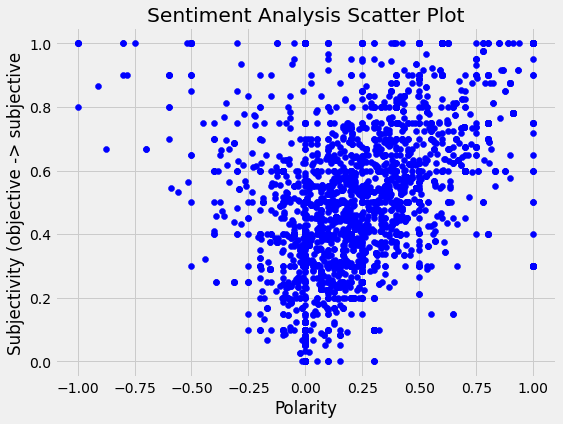

In [62]:
#Create a scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective -> subjective')
plt.show()

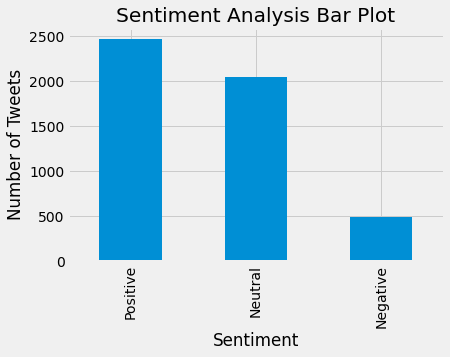

In [65]:
#Create a bar chart to show the count of Positive, Neutral and Negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()